<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Загрузка-данных." data-toc-modified-id="Загрузка-данных.-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Загрузка данных.</a></span><ul class="toc-item"><li><span><a href="#Изучим-общую-информацию-о-датафрейме" data-toc-modified-id="Изучим-общую-информацию-о-датафрейме-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Изучим общую информацию о датафрейме</a></span></li><li><span><a href="#Предобработка-данных:" data-toc-modified-id="Предобработка-данных:-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Предобработка данных:</a></span></li></ul></li><li><span><a href="#Умножение-матриц." data-toc-modified-id="Умножение-матриц.-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Умножение матриц.</a></span></li><li><span><a href="#Алгоритм-преобразования." data-toc-modified-id="Алгоритм-преобразования.-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Алгоритм преобразования.</a></span></li><li><span><a href="#Проверка-алгоритма." data-toc-modified-id="Проверка-алгоритма.-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Проверка алгоритма.</a></span></li><li><span><a href="#Общий-вывод:" data-toc-modified-id="Общий-вывод:-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Общий вывод:</a></span></li><li><span><a href="#Чек-лист-проверки" data-toc-modified-id="Чек-лист-проверки-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Чек-лист проверки</a></span></li></ul></div>

# Защита персональных данных клиентов

Вам нужно защитить данные клиентов страховой компании «Хоть потоп». Разработайте такой метод преобразования данных, чтобы по ним было сложно восстановить персональную информацию. Обоснуйте корректность его работы.

Нужно защитить данные, чтобы при преобразовании качество моделей машинного обучения не ухудшилось. Подбирать наилучшую модель не требуется.

 **Описание данных:**
- Признаки: пол, возраст и зарплата застрахованного, количество членов его семьи.
- Целевой признак: количество страховых выплат клиенту за последние 5 лет.

**План работы:**

1. Загрузите и изучите данные.

2. Ответьте на вопрос и обоснуйте решение.

- Признаки умножают на обратимую матрицу. Изменится ли качество линейной регрессии? (Её можно обучить заново.)   
    - a. Изменится. Приведите примеры матриц.  
    - b. Не изменится. Укажите, как связаны параметры линейной регрессии в исходной задаче и в преобразованной.  
    
3. Предложите алгоритм преобразования данных для решения задачи. Обоснуйте, почему качество линейной регрессии не поменяется.

4. Запрограммируйте этот алгоритм, применив матричные операции. Проверьте, что качество линейной регрессии из sklearn не отличается до и после преобразования. Примените метрику R2.

## Загрузка данных.

Импортируем нужные библиотеки

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# увеличим дефолтный размер графиков
from pylab import rcParams
rcParams["figure.figsize"] = 12, 20

In [2]:
# Открываем и сохраняем файл Churn.csv в датафрейм из директории или по ссылке:
try:
    df_pdc = pd.read_csv('/datasets/insurance.csv')
except:
    df_pdc = pd.read_csv('https://code.s3.yandex.net/datasets/insurance.csv')

### Изучим общую информацию о датафрейме

In [3]:
# Посмотрим полную информацию датафрейма:  
df_pdc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Пол                5000 non-null   int64  
 1   Возраст            5000 non-null   float64
 2   Зарплата           5000 non-null   float64
 3   Члены семьи        5000 non-null   int64  
 4   Страховые выплаты  5000 non-null   int64  
dtypes: float64(2), int64(3)
memory usage: 195.4 KB


In [4]:
# Выведем первые пять строк датафрейма df_pdc:
df_pdc.head()

,Пол,Возраст,Зарплата,Члены семьи,Страховые выплаты
0,1,41.0,49600.0,1,0
1,0,46.0,38000.0,1,1
2,0,29.0,21000.0,0,0
3,0,21.0,41700.0,2,0
4,1,28.0,26100.0,0,0


***Вывод:***  
- В датасете 5 столбцов и 4999 записей.
- Пропусков нет.
- Привести названия стобцов к стандарту PEP8.

**Посмотрим на распределение данных:**

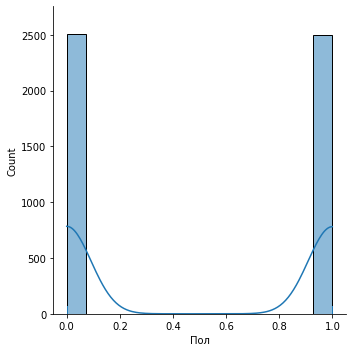

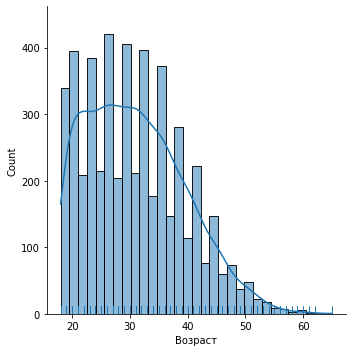

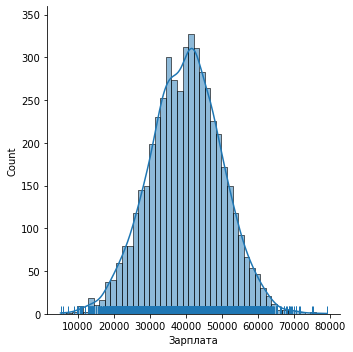

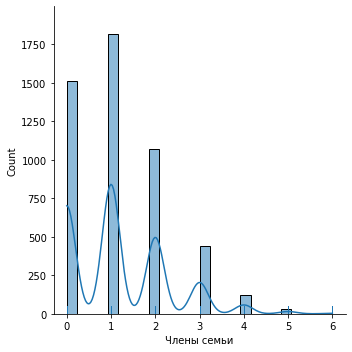

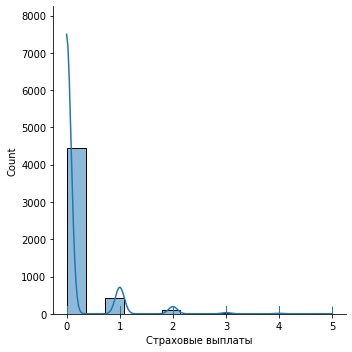

In [5]:
for column in ['Пол','Возраст', 'Зарплата', 'Члены семьи','Страховые выплаты']:
    sns.displot(df_pdc[column],kind='hist',rug=True,kde=True);  

In [6]:
df_pdc['Страховые выплаты'].value_counts()

0    4436
1     423
2     115
3      18
4       7
5       1
Name: Страховые выплаты, dtype: int64

In [7]:
df_pdc.describe()

,Пол,Возраст,Зарплата,Члены семьи,Страховые выплаты
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,0.499000,30.952800,39916.360000,1.194200,0.148000
std,0.500049,8.440807,9900.083569,1.091387,0.463183
min,0.000000,18.000000,5300.000000,0.000000,0.000000
25%,0.000000,24.000000,33300.000000,0.000000,0.000000
50%,0.000000,30.000000,40200.000000,1.000000,0.000000
75%,1.000000,37.000000,46600.000000,2.000000,0.000000
max,1.000000,65.000000,79000.000000,6.000000,5.000000


**Посмотрим на корреляцию данных**

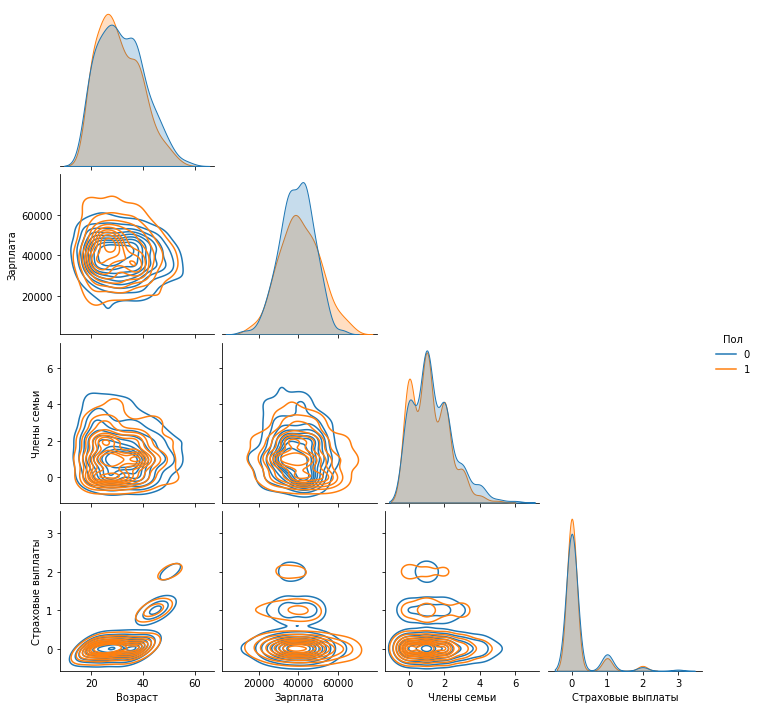

In [8]:
sns.pairplot(df_pdc.sample(frac=0.1, random_state=314159), hue='Пол', corner=True, kind='kde')
plt.show()

In [9]:
df_pdc.corr()

,Пол,Возраст,Зарплата,Члены семьи,Страховые выплаты
Пол,1.000000,0.002074,0.014910,-0.008991,0.010140
Возраст,0.002074,1.000000,-0.019093,-0.006692,0.651030
Зарплата,0.014910,-0.019093,1.000000,-0.030296,-0.014963
Члены семьи,-0.008991,-0.006692,-0.030296,1.000000,-0.036290
Страховые выплаты,0.010140,0.651030,-0.014963,-0.036290,1.000000


***Вывод:***  
- Визуально выбросов не наблюдается, пропусков тоже
- Пол : Примерно 50/50 мужчин и женщин
- Медианное значение возрасата 30 лет, среднее 31. Распределение скошено влево. Границы возраста застрахованных приводят к выводу, что компания не занимается страхованием лиц, чей возраст составляет менее 18 и старше 65 лет.
- По зарплате распределение близко к нормальному. Скошено вправо - медиана составляет чуть более 40 000 рублей. В целом, в компании скорее представлен средний класс, чем слишком бедные или слишком богатые граждане.
- В семье в среднем 1,1 член семьи, но медианное значение равно 1. 
- Страховые выплаты. 4436 человек не получали никогда страховых выплат, 423 - одни раз, 115 -чел. 2 раза и тд. Один клиент получил выплаты целых 5 раз
- Высокая корреляция наблюдается между возрастом и страховыми выплатами (0.65). Наименьшая зависимость между полом клиента и страховой выплатой.

### Предобработка данных:

In [10]:
# Проверим себя и напишем функцию для определения уникальных значений:
def show_rows(data_frame):
    for column in data_frame.columns:
        print('Уникальные значения столбца', column)
        print(data_frame[column].unique())
    print('Количество пропусков в столбце')    
    print(data_frame.isna().mean())

In [11]:
show_rows(df_pdc)

Уникальные значения столбца Пол
[1 0]
Уникальные значения столбца Возраст
[41. 46. 29. 21. 28. 43. 39. 25. 36. 32. 38. 23. 40. 34. 26. 42. 27. 33.
 47. 30. 19. 31. 22. 20. 24. 18. 37. 48. 45. 44. 52. 49. 35. 56. 65. 55.
 57. 54. 50. 53. 51. 58. 59. 60. 61. 62.]
Уникальные значения столбца Зарплата
[49600. 38000. 21000. 41700. 26100. 41000. 39700. 38600. 49700. 51700.
 36600. 29300. 39500. 55000. 43700. 23300. 48900. 33200. 36900. 43500.
 36100. 26600. 48700. 40400. 38400. 34600. 34800. 36800. 42200. 46300.
 30300. 51000. 28100. 64800. 30400. 45300. 38300. 49500. 19400. 40200.
 31700. 69200. 33100. 31600. 34500. 38700. 39600. 42400. 34900. 30500.
 24200. 49900. 14300. 47000. 44800. 43800. 42700. 35400. 57200. 29600.
 37400. 48100. 33700. 61800. 39400. 15600. 52600. 37600. 52500. 32700.
 51600. 60900. 41800. 47400. 26500. 45900. 35700. 34300. 26700. 25700.
 33300. 31100. 31500. 42100. 37300. 42500. 27300. 46800. 33500. 44300.
 41600. 53900. 40100. 44600. 45000. 32000. 38200. 33000. 38500

В столбцах `Возраст` и `Зарплата` тип данных float, хотя значения целые, так что поменяем их для уменьшения памяти и быстродействия программы.

In [12]:
# Проверим на дубликаты:
print('Кол-во дубликатов -', df_pdc.duplicated().sum())

Кол-во дубликатов - 153


In [13]:
# Изменим тип данных в столбцах Пол,Возраст, Зарплата и Члены семьи на int:
df_pdc['Пол'] = df_pdc['Пол'].astype('int8')
df_pdc['Возраст'] = df_pdc['Возраст'].astype('int8')
df_pdc['Зарплата'] = df_pdc['Зарплата'].astype('int')
df_pdc['Члены семьи'] = df_pdc['Члены семьи'].astype('int8')

In [14]:
df_pdc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   Пол                5000 non-null   int8 
 1   Возраст            5000 non-null   int8 
 2   Зарплата           5000 non-null   int64
 3   Члены семьи        5000 non-null   int8 
 4   Страховые выплаты  5000 non-null   int64
dtypes: int64(2), int8(3)
memory usage: 92.9 KB


In [15]:
# Приводим название столбцов к стандарту PEP8:
df_pdc.rename(columns={
    'Пол':'gender',
    'Возраст':'age',
    'Зарплата':'salary',
    'Члены семьи':'family',
    'Страховые выплаты':'payments'
}, inplace=True)

In [16]:
# Проверяем:
df_pdc.head()

,gender,age,salary,family,payments
0,1,41,49600,1,0
1,0,46,38000,1,1
2,0,29,21000,0,0
3,0,21,41700,2,0
4,1,28,26100,0,0


***Вывод:***  
- В датасете 5 столбцов и 4999 записей.
- Визуально выбросов не наблюдается, пропусков тоже
- Найдено 153 дубликата, но т.к. нет уникального идентификатора, количество повторов небольшое, а чтобы убедиться что это действительно дубликаты данных мало - оставим без изменений.
- Пол : Примерно 50/50 мужчин и женщин
- Медианное значение возраста 30 лет, среднее 31. Распределение скошено влево. Границы возраста застрахованных приводят к выводу, что компания не занимается страхованием лиц, чей возраст составляет менее 18 и старше 65 лет.
- По зарплате распределение близко к нормальному. Скошено вправо - медиана составляет чуть более 40 000 рублей. В целом, в компании скорее представлен средний класс, чем слишком бедные или слишком богатые граждане.
- В семье в среднем 1,1 член семьи, но медианное значение равно 1. 
- Страховые выплаты: 4436 человек не получали никогда страховых выплат, 423 - одни раз, 115 -чел. 2 раза и тд. Один клиент получил выплаты целых 5 раз
- Высокая корреляция наблюдается между возрастом и страховыми выплатами (0.65). Наименьшая зависимость между полом клиента и страховой выплатой.
- Изменили тип данных в столбцах `Пол, Возраст, Зарплата и Члены семьи` на int, сократив размер датасета в два раза.
- Привели названия столбцов к стандарту PEP8.

## Умножение матриц.

**Вопрос:** Признаки умножают на обратимую матрицу. Изменится ли качество линейной регрессии? (Её можно обучить заново.)  
**Ответ:** не изменится

**Обоснование:**

Обозначения:

- $X$ — матрица признаков (нулевой столбец состоит из единиц)

- $y$ — вектор целевого признака

- $P$ — матрица, на которую умножаются признаки

- $w$ — вектор весов линейной регрессии (нулевой элемент равен сдвигу)

Предсказания:

$$
a = Xw
$$

Функция минимизации потерь для задачи обучения:

$$
w = \arg\min_w MSE(Xw, y)
$$

Функция argmin() находит минимум и возвращает, при каком аргументе он был достигнут.

Формула обучения весов модели:

$$
w = (X^T X)^{-1} X^T y \tag{1}
$$

Используем свойства матричных операций:

$$
(A B)^T= B^T A^T \tag{2}
$$

$$
(A B)^{-1}= B^{-1} A^{-1} \tag{3}
$$

Домнажаем матрицу признаков ***X*** на матрицу шифрования ***P*** и подставим результат в формулу обучения (1):

$$
w_{new} = ((X P)^T (X P))^{-1} (X P)^T y
$$

Применим свойство (2) и раскроем скобки:

$$
w_{new} = (P^T X^T X P)^{-1} P^T X^T y
$$

Применим свойство (3) и раскроем скобки:

$$
w_{new} = P^{-1} (X^T X)^{-1} (P^T)^{-1} P^T X^T y
$$

Можнo заметить, что $(P^T)^{-1} P^T = E$, следовательно формула примет вид:

$$
w_{new} = P^{-1} (X^T X)^{-1} X^T y
$$

Используем (1), чтобы свернуть формулу и получим следующее:

$$
w_{new} = P^{-1} w
$$

Следовательно, так как веса линейной регрессии связаны, то качество модели, определяемое коэффициентом детерминации $R2$
, не изменится. Модель будет давать одинаковые предсказания.  

Подставим в формулу предсказаний $a = Xw$  матрицу $X_{new} = XP$
 и признаки $w_{new}$:
 
 $$
 a_{new}=XPw_{new}= XPP^{-1} w = Xw = a
 $$

## Алгоритм преобразования.

**Алгоритм**

Алгоритм шифрования состоит из обычного линейного преобразования. Оригинальный массив данных с признаками $X$ размерности $(m x n)$ мы домножаем на случайную ~~квадратную~~ обратимую матрицу $P$ размерности $(n x n)$, которую подбираем с помощью генератора случайных чисел:

$$
X'=XP
$$


**Обоснование**

Как уже было доказано выше, такое преобразование признаков не влияет на качество предсказания целевого признака. Далее, как обычно, разделяем данные на обучающую и тестовую выборки и обучаем модель на тренировочной выборке. Задача обучения остаётся такой же, признаки изменены, но значения целевого признака остались неизменными:

$$
w' = \arg\min_{w'} MSE(X'w', y)
$$

Формула обучения остаётся подобной, однако слегка усложняется дополнительной матрицей:

$$
w' = ((XP)^T (XP))^{-1} (XP)^T y
$$

После этого получим предсказания:

$$
a'= X'w' = (XP)((XP)^T (XP))^{-1} (XP)^T y
$$

И оценим качество предсказаний с помощью функции MSE:

$$
MSE(a',y)
$$

Аналогичные действия произведем как с тестовой выборкой зашифрованных данных, так и для обычных, незашифрованных данных, после чего сравним результаты для зашифрованных и незашифрованных данных. С учётом доказательства, полученного выше, результаты для зашифрованной и незашифрованной выборок должны быть идентичными.

Кроме того, мы можем восстановить зашифрованные данные с помощью умножения преобразованной матрицы на матрицу $P^{-1}$, обратную $P$:

$$
X'P^{-1}= XPP^{-1}= X
$$

Таким образом, на следующем шаге нам следует:

1. Создать случайную матрицу $P$ размерности $(n x n)$ для матрицы $X$ размерности $(m x n)$.
.
2. Сразу проверяем полученную матрицу на обратимость.
    ~~- если матрица обратима, идём дальше.
    ~- если матрица необратима, генерируем новые матрицы, до тех пор пока не получим обратимую матрицу или пока не достигнем лимита итераций.~~
3. Сохранаяем пару матриц $P,P^{-1}$, как ключи для шифровки/ дешифровки.
4. Преобразовываем данные с помощью умножения матрицы $X$ на матрицу $P$
5. Проверяем способность восстановить данные с помощью умножения на матрицу $P^{-1}$
6. Сравниваем метрики для линейной регрессии на оригинальных и преобразованных данных.
7. Вывод.

## Проверка алгоритма.

Проверим, что качество линейной регрессии из sklearn не отличается до и после преобразования. Примените метрику R2

In [17]:
# Выделяем признаки и целевой признак:
features = df_pdc.drop('payments',axis=1)
target = df_pdc['payments']

features.shape, target.shape

((5000, 4), (5000,))

In [18]:
# Разбиваем на обучающую и тестовую выборки:
features_train, features_test, target_train, target_test = train_test_split(features,
                                                                            target,
                                                                            test_size=0.25,
                                                                            random_state=314159)

In [19]:
# Модель с исходными признаками без преобразования:
model = LinearRegression()
model.fit(features_train, target_train)
R2_LR_origin_data = r2_score(target_test, model.predict(features_test))
print('Значение метрики R2 для линейной регрессии после преобразования:', R2_LR_origin_data)

Значение метрики R2 для линейной регрессии после преобразования: 0.3831841050431003


In [20]:
# Выведем саму матрицу:
#rand_matrix = np.random.randint(5, size=(4, 4))
#rand_matrix

In [21]:
# Проверка обратимости матрицы:
#inv_rand_matrix = np.linalg.inv(rand_matrix)
#inv_rand_matrix

Функция гарантированного создания обратимой матрицы:

In [22]:
def get_rand_matrix():
    det = 0
    while det == 0:
        matrix = np.random.normal(size=(features_train.shape[1], features_train.shape[1]))
        det = np.linalg.det(matrix)
    return matrix
rand_matrix = get_rand_matrix()

print('\nМатрица rand_matrix:\n', rand_matrix)


Матрица rand_matrix:
 [[ 0.9616856   0.21966813 -0.16480389 -1.40733722]
 [ 0.40699612  2.53729871 -0.48095099 -0.14633014]
 [ 0.1312043  -0.37864571  0.1932289   0.34966028]
 [ 0.1510304  -1.59627898 -0.9123086   1.42697169]]


In [23]:
print('\nПроверка на единичную матрицу:\n', (rand_matrix @ np.linalg.inv(rand_matrix)).round(5))


Проверка на единичную матрицу:
 [[ 1.  0.  0. -0.]
 [-0.  1.  0.  0.]
 [ 0. -0.  1.  0.]
 [-0.  0. -0.  1.]]


In [24]:
# Продемонстрируем перемноженную матрицу:
feature_encrypt = features @ rand_matrix
#feature_encrypt.columns = features.columns

# Декодирование признаков:
decode = round(feature_encrypt @ np.linalg.inv(rand_matrix)).astype(int)
decode.columns = features.columns

In [25]:
print('Исходные признаки:')
display(features.head())
print('__________________________________________________________________________')
print()
print('Зашифрованные признаки:')
display(feature_encrypt.head())
print('__________________________________________________________________________')
print()
print('Расшифрованные признаки:')
decode.head()

Исходные признаки:


,gender,age,salary,family
0,1,41,49600,1
1,0,46,38000,1
2,0,29,21000,0
3,0,21,41700,2
4,1,28,26100,0


__________________________________________________________________________

Зашифрованные признаки:


,0,1,2,3
0,6525.533008,-18678.174519,9563.357361,17337.170178
1,5004.636383,-14273.417472,7319.662164,13281.786572
2,2767.093260,-7877.978222,4043.859331,7338.622387
3,5480.068433,-15739.435341,8045.720562,14580.614848
4,3436.789897,-9811.388967,5029.642871,9120.628828


__________________________________________________________________________

Расшифрованные признаки:


,gender,age,salary,family
0,1,41,49600,1
1,0,46,38000,1
2,0,29,21000,0
3,0,21,41700,2
4,1,28,26100,0


In [26]:
# Модель с исходными признаками после преобразования:
features_train = features_train @ rand_matrix
features_test = features_test @ rand_matrix
    
model = LinearRegression()
model.fit(features_train, target_train)
R2_LR_cipher_data = r2_score(target_test, model.predict(features_test))
print('Значение метрики R2 для линейной регрессии после преобразования:',R2_LR_cipher_data)

Значение метрики R2 для линейной регрессии после преобразования: 0.38318410504307576


In [27]:
result = pd.DataFrame(data= [R2_LR_origin_data,
                      R2_LR_cipher_data], 
                      columns=['R2'], 
                      index=['Качество на исходных данных',                            
                            'Качество на преобразованных признаках',])
result

,R2
Качество на исходных данных,0.383184
Качество на преобразованных признаках,0.383184


***Вывод:*** Домножение признаков на обратимую квадратную матрицу не повлияло на качество модели. Данные успешно зашифрованы и неподготовленный человек не сможет проанализировать наши данные. В то же время это позволяет нам успешно предсказывать для каждого клиента количество страховых выплат.

## Общий вывод:

- Данные были загружены и проанализированы. В датасете 5 столбцов и 4999 записей. Описание данных:
    - Признаки: пол, возраст и зарплата застрахованного, количество членов его семьи.
    - Целевой признак: количество страховых выплат клиенту за последние 5 лет.
- Визуально выбросов не наблюдается, пропусков тоже
- Найдено 153 дубликата, но т.к. нет уникального идентификатора, количество повторов небольшое, а чтобы убедиться что это действительно дубликаты данных мало - оставим без изменений.
- Пол : Примерно 50/50 мужчин и женщин
- Медианное значение возраста 30 лет, среднее 31. Распределение скошено влево. Границы возраста застрахованных приводят к выводу, что компания не занимается страхованием лиц, чей возраст составляет менее 18 и старше 65 лет.
- По зарплате распределение близко к нормальному. Скошено вправо - медиана составляет чуть более 40 000 рублей. В целом, в компании скорее представлен средний класс, чем слишком бедные или слишком богатые граждане.
- В семье в среднем 1,1 член семьи, но медианное значение равно 1. 
- Страховые выплаты: 4436 человек не получали никогда страховых выплат, 423 - одни раз, 115 -чел. 2 раза и тд. Один клиент получил выплаты целых 5 раз
- Высокая корреляция наблюдается между возрастом и страховыми выплатами (0.65). Наименьшая зависимость между полом клиента и страховой выплатой.
- Изменили тип данных в столбцах `Пол,Возраст, Зарплата и Члены семьи` на int, сократив размер датасета в два раза.
- Привели названия столбцов к стандарту PEP8.
- Был разработан алгоритм преобразования данных и применен на данных.
- Качество линейной регресии не изменилось от использования исxодной матрицы и исходной матрицы, умноженной на обратимую. Приведено доказательство математическим и практическим путем (была исследована метрика R2). Домножение признаков на обратимую квадратную матрицу не повлияло на качество модели. Данные успешно зашифрованы и неподготовленный человек не сможет проанализировать наши данные. В то же время это позволяет нам успешно предсказывать для каждого клиента количество страховых выплат.

## Чек-лист проверки

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x]  Jupyter Notebook открыт
- [x]  Весь код выполняется без ошибок
- [x]  Ячейки с кодом расположены в порядке исполнения
- [x]  Выполнен шаг 1: данные загружены
- [x]  Выполнен шаг 2: получен ответ на вопрос об умножении матриц
    - [x]  Указан правильный вариант ответа
    - [x]  Вариант обоснован
- [x]  Выполнен шаг 3: предложен алгоритм преобразования
    - [x]  Алгоритм описан
    - [x]  Алгоритм обоснован
- [x]  Выполнен шаг 4: алгоритм проверен
    - [x]  Алгоритм реализован
    - [x]  Проведено сравнение качества моделей до и после преобразования